In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

# import data file to check all data

In [2]:
df=pd.read_csv('dsv name.csv')

In [3]:
df

,Brand_Name,Id,Month,MTD_Budget,MTD_Sales,MTD Surplus_Deficit,MTD_Achievement,YTD_Budget,YTD_Sales,YTD Surplus/Deficit,YTD_ACH (%),Disease_Area
0,BECOSULES,9,January,1760726.49,861962.98,-898763.51,48.95,1760726.49,861962.98,-898763.51,48.95,Vitamin&Minerals
1,BECOSULES,9,February,1594030.49,212710.09,-1381320.40,13.34,3354756.97,1918012.33,-1436744.65,57.17,Vitamin&Minerals
2,BECOSULES,9,March,1739889.49,194239.88,-1545649.61,11.16,5094646.46,3255201.42,-1839445.04,63.89,Vitamin&Minerals
3,BECOSULES,9,April,1666959.99,256641.30,-1410318.68,15.40,6761606.45,5004855.47,-1756750.98,74.02,Vitamin&Minerals
4,BECOSULES,9,May,1594030.49,190588.85,-1403441.64,11.96,8355636.93,6598977.29,-1756659.64,78.98,Vitamin&Minerals
...,...,...,...,...,...,...,...,...,...,...,...,...
1999,MAXIPASS,85,August,728266.16,43793.44,-684472.72,6.01,"5,263,199.19","3,483,504.22",-1779694.97,66.19,Alpha-1 Blocker
2000,MAXIPASS,85,September,728266.16,43974.00,-684292.16,6.04,"5,991,465.34","3,847,935.82",-2143529.52,64.22,Alpha-1 Blocker
2001,MAXIPASS,85,October,724329.58,33700.50,-690629.08,4.65,"6,715,794.93","4,210,910.28",-2504884.65,62.70,Alpha-1 Blocker
2002,MAXIPASS,85,November,708583.29,61385.63,-647197.66,8.66,"7,424,378.21","4,641,142.03",-2783236.19,62.51,Alpha-1 Blocker


# drop out brand name which replace by id

In [4]:
df=df.drop(['Brand_Name'],axis=1)

In [5]:
df

,Id,Month,MTD_Budget,MTD_Sales,MTD Surplus_Deficit,MTD_Achievement,YTD_Budget,YTD_Sales,YTD Surplus/Deficit,YTD_ACH (%),Disease_Area
0,9,January,1760726.49,861962.98,-898763.51,48.95,1760726.49,861962.98,-898763.51,48.95,Vitamin&Minerals
1,9,February,1594030.49,212710.09,-1381320.40,13.34,3354756.97,1918012.33,-1436744.65,57.17,Vitamin&Minerals
2,9,March,1739889.49,194239.88,-1545649.61,11.16,5094646.46,3255201.42,-1839445.04,63.89,Vitamin&Minerals
3,9,April,1666959.99,256641.30,-1410318.68,15.40,6761606.45,5004855.47,-1756750.98,74.02,Vitamin&Minerals
4,9,May,1594030.49,190588.85,-1403441.64,11.96,8355636.93,6598977.29,-1756659.64,78.98,Vitamin&Minerals
...,...,...,...,...,...,...,...,...,...,...,...
1999,85,August,728266.16,43793.44,-684472.72,6.01,"5,263,199.19","3,483,504.22",-1779694.97,66.19,Alpha-1 Blocker
2000,85,September,728266.16,43974.00,-684292.16,6.04,"5,991,465.34","3,847,935.82",-2143529.52,64.22,Alpha-1 Blocker
2001,85,October,724329.58,33700.50,-690629.08,4.65,"6,715,794.93","4,210,910.28",-2504884.65,62.70,Alpha-1 Blocker
2002,85,November,708583.29,61385.63,-647197.66,8.66,"7,424,378.21","4,641,142.03",-2783236.19,62.51,Alpha-1 Blocker


# check null or empty value in dataset

In [6]:
df.isnull().sum()

Id                     0
Month                  0
MTD_Budget             0
MTD_Sales              0
MTD Surplus_Deficit    0
MTD_Achievement        0
YTD_Budget             0
YTD_Sales              0
YTD Surplus/Deficit    0
YTD_ACH (%)            0
Disease_Area           0
dtype: int64

# dataframe in array all features

In [7]:
df[['Id','Month','MTD_Budget','MTD_Sales','MTD Surplus_Deficit','MTD_Achievement','Disease_Area']]

,Id,Month,MTD_Budget,MTD_Sales,MTD Surplus_Deficit,MTD_Achievement,Disease_Area
0,9,January,1760726.49,861962.98,-898763.51,48.95,Vitamin&Minerals
1,9,February,1594030.49,212710.09,-1381320.40,13.34,Vitamin&Minerals
2,9,March,1739889.49,194239.88,-1545649.61,11.16,Vitamin&Minerals
3,9,April,1666959.99,256641.30,-1410318.68,15.40,Vitamin&Minerals
4,9,May,1594030.49,190588.85,-1403441.64,11.96,Vitamin&Minerals
...,...,...,...,...,...,...,...
1999,85,August,728266.16,43793.44,-684472.72,6.01,Alpha-1 Blocker
2000,85,September,728266.16,43974.00,-684292.16,6.04,Alpha-1 Blocker
2001,85,October,724329.58,33700.50,-690629.08,4.65,Alpha-1 Blocker
2002,85,November,708583.29,61385.63,-647197.66,8.66,Alpha-1 Blocker


# statatical analysis all data

In [8]:
df.describe()

,Id,MTD_Budget,MTD_Sales,MTD Surplus_Deficit,MTD_Achievement,YTD Surplus/Deficit,YTD_ACH (%)
count,2004.000000,2.004000e+03,2.004000e+03,2.004000e+03,2004.000000,2.004000e+03,2004.000000
mean,83.796407,8.170753e+06,1.321855e+06,-6.860362e+06,19.620664,-1.370251e+07,74.964441
std,48.534782,1.675254e+07,3.474201e+06,1.400907e+07,39.061523,3.447091e+07,63.154341
min,1.000000,5.723983e+04,1.458800e+02,-9.473522e+07,0.030000,-2.554013e+08,0.000000
25%,41.000000,7.650692e+05,7.807314e+04,-5.941172e+06,7.790000,-1.128494e+07,50.952500
50%,83.000000,2.071066e+06,2.554653e+05,-1.684675e+06,11.445000,-2.852662e+06,71.745000
75%,126.000000,6.643402e+06,8.874573e+05,-5.968006e+05,16.182500,-8.297154e+05,85.080000
max,168.000000,1.090395e+08,4.711580e+07,8.672889e+06,912.490000,1.241689e+08,836.150000


# corelation budget,sales,surplus,achievement to check any features <1

In [9]:
df=df[['Id','Month','MTD_Budget','MTD_Sales','MTD Surplus_Deficit','MTD_Achievement','Disease_Area']]
corelation=df[['MTD_Budget','MTD_Sales','MTD Surplus_Deficit','MTD_Achievement']]

<AxesSubplot:>

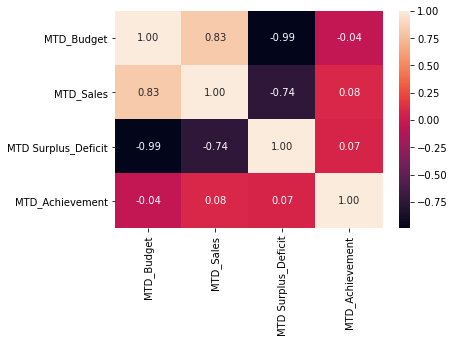

In [10]:
sns.heatmap(corelation.corr(),annot=True,fmt='0.2f')

# monthly sales analysis

In [11]:
lis=[sum(df[df['Month']==i]['MTD_Sales']) for i in df['Month'].unique()]
for i in range(0,len(lis)):
    print(f"{df['Month'].unique()[i]}   =    {lis[i]}")

January   =    664411586.72
February   =    171899046.8
March   =    147094628.99
April   =    184445973.3700001
May   =    150319587.01000002
June   =    163667919.45000002
July   =    179011678.06
August   =    241714736.65000007
September   =    222900478.77000013
October   =    187105365.73999998
November   =    207769615.66000006
December   =    128655869.00000001


# id wise sales analysis

In [12]:
lis=[sum(df[df['Id']==i]['MTD_Sales']) for i in df['Id'].unique()]
for i in range(0,len(lis)):
    print(f"{df['Id'].unique()[i]}   =    {lis[i]}")

9   =    3454534.34
15   =    1583115.8199999998
16   =    47648230.5
22   =    2673604.57
30   =    32935608.570000004
42   =    18178770.599999998
76   =    5740137.449999999
83   =    7872367.34
88   =    1131362.6700000002
101   =    68598776.43
161   =    6489362.59
99   =    587706.29
114   =    3846163.63
34   =    1614875.5400000003
67   =    373203.91
154   =    967308.92
140   =    2491045.9799999995
119   =    13487564.7
84   =    342553.20999999996
139   =    1267156.8800000001
13   =    3132371.08
45   =    20430574.240000002
41   =    1229156.4400000002
115   =    3903005.840000001
128   =    2816083.6599999997
136   =    174692219.27999997
164   =    1617298.0499999996
165   =    7033828.3100000005
21   =    2999859.26
133   =    6650771.419999998
79   =    111659.17999999998
86   =    4049197.17
10   =    4522875.72
5   =    14154953.559999995
149   =    735269.23
28   =    12571058.389999999
56   =    344814.39
64   =    4509207.28
137   =    24453847.650000002
146   =

# diasease category replace by number (label encoding technique)

In [13]:
df['Disease_Area']=df['Disease_Area'].replace('Vitamin&Minerals',1)
df['Disease_Area']=df['Disease_Area'].replace('Uterotonic Agent',2)
df['Disease_Area']=df['Disease_Area'].replace('Urological',3)
df['Disease_Area']=df['Disease_Area'].replace('Thrombolytic',4)
df['Disease_Area']=df['Disease_Area'].replace('Spasmolytics',5)
df['Disease_Area']=df['Disease_Area'].replace('Serotonin Syndrome',6)
df['Disease_Area']=df['Disease_Area'].replace('Parkinsons disease',7)
df['Disease_Area']=df['Disease_Area'].replace('Oral redydration',8)
df['Disease_Area']=df['Disease_Area'].replace('Oral contraception',9)
df['Disease_Area']=df['Disease_Area'].replace('Nsaids',10)
df['Disease_Area']=df['Disease_Area'].replace('Natural Progesterone',11)
df['Disease_Area']=df['Disease_Area'].replace('Myelodysplastic Syndrome',12)
df['Disease_Area']=df['Disease_Area'].replace('Muscle Relaxant',13)
df['Disease_Area']=df['Disease_Area'].replace('Menieres Disease',14)
df['Disease_Area']=df['Disease_Area'].replace('Male Sex Hormone',15)
df['Disease_Area']=df['Disease_Area'].replace('Major Depressive Disorder',16)
df['Disease_Area']=df['Disease_Area'].replace('Lipid Lowering Agent',17)
df['Disease_Area']=df['Disease_Area'].replace('Laxative',18)
df['Disease_Area']=df['Disease_Area'].replace('Hypnotics And Sedatives',19)
df['Disease_Area']=df['Disease_Area'].replace('Hormone Replacement Therapy',20)
df['Disease_Area']=df['Disease_Area'].replace('Hematinics',21)
df['Disease_Area']=df['Disease_Area'].replace('Gynecological & Other Hormones',22)
df['Disease_Area']=df['Disease_Area'].replace('Gastroprokinetic',23)
df['Disease_Area']=df['Disease_Area'].replace('Gallstone Therapy',24)
df['Disease_Area']=df['Disease_Area'].replace('Expectorant',25)
df['Disease_Area']=df['Disease_Area'].replace('Erectile Dysfunction',26)
df['Disease_Area']=df['Disease_Area'].replace('Corticosteroids',27)
df['Disease_Area']=df['Disease_Area'].replace('Contraceptives',29)
df['Disease_Area']=df['Disease_Area'].replace('Cardiovascular',30)
df['Disease_Area']=df['Disease_Area'].replace('Antithyroid Agents',31)
df['Disease_Area']=df['Disease_Area'].replace('Anti-Psychotic',32)
df['Disease_Area']=df['Disease_Area'].replace('Antiemetic & Antinauseant',33)
df['Disease_Area']=df['Disease_Area'].replace('Anti-Diabetic',34)
df['Disease_Area']=df['Disease_Area'].replace('Anti-Cancer',35)
df['Disease_Area']=df['Disease_Area'].replace('Antibiotic',36)
df['Disease_Area']=df['Disease_Area'].replace('Antibacterial',37)
df['Disease_Area']=df['Disease_Area'].replace('Anti-Anginal',38)
df['Disease_Area']=df['Disease_Area'].replace('Anti-Ulcerant',39)
df['Disease_Area']=df['Disease_Area'].replace('Anti-Spasmodic',40)
df['Disease_Area']=df['Disease_Area'].replace('Anti-Protozoal',41)
df['Disease_Area']=df['Disease_Area'].replace('Anti-Osteoporotic',42)
df['Disease_Area']=df['Disease_Area'].replace('Anti-Migraine & Anti-Vertigo',43)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Histamines',44)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Hemmorrhoidal',45)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Gout',46)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Fungal',47)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Fibrinolytics',48)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Epileptics',49)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Emetic',50)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Depressants',51)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Coagulant',52)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Asthmatic',53)
df['Disease_Area']=df['Disease_Area'].replace('Anti - Arthritic',54)
df['Disease_Area']=df['Disease_Area'].replace('Anaesthetics',55)
df['Disease_Area']=df['Disease_Area'].replace('Anabolic Hormones',56)
df['Disease_Area']=df['Disease_Area'].replace('Vasodilating Beta-1 Blocker',57)
df['Disease_Area']=df['Disease_Area'].replace('Platelet Aggregation Inhibitor',58)
df['Disease_Area']=df['Disease_Area'].replace('Immunosuppressant',59)
df['Disease_Area']=df['Disease_Area'].replace('Expectorant',60)
df['Disease_Area']=df['Disease_Area'].replace('Alpha-1 Blocker',61)



<ipython-input-13-1e79941c9d90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disease_Area']=df['Disease_Area'].replace('Vitamin&Minerals',1)
<ipython-input-13-1e79941c9d90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disease_Area']=df['Disease_Area'].replace('Uterotonic Agent',2)
<ipython-input-13-1e79941c9d90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [14]:
df

,Id,Month,MTD_Budget,MTD_Sales,MTD Surplus_Deficit,MTD_Achievement,Disease_Area
0,9,January,1760726.49,861962.98,-898763.51,48.95,1
1,9,February,1594030.49,212710.09,-1381320.40,13.34,1
2,9,March,1739889.49,194239.88,-1545649.61,11.16,1
3,9,April,1666959.99,256641.30,-1410318.68,15.40,1
4,9,May,1594030.49,190588.85,-1403441.64,11.96,1
...,...,...,...,...,...,...,...
1999,85,August,728266.16,43793.44,-684472.72,6.01,61
2000,85,September,728266.16,43974.00,-684292.16,6.04,61
2001,85,October,724329.58,33700.50,-690629.08,4.65,61
2002,85,November,708583.29,61385.63,-647197.66,8.66,61


# months replace by number 

In [15]:
df['Month']=df['Month'].replace('January',1)
df['Month']=df['Month'].replace('February',2)
df['Month']=df['Month'].replace('March',3)
df['Month']=df['Month'].replace('April',4)
df['Month']=df['Month'].replace('May',5)
df['Month']=df['Month'].replace('June',6)
df['Month']=df['Month'].replace('July',7)
df['Month']=df['Month'].replace('August',8)
df['Month']=df['Month'].replace('September',9)
df['Month']=df['Month'].replace('October',10)
df['Month']=df['Month'].replace('November',11)
df['Month']=df['Month'].replace('December',12)

<ipython-input-15-2df633816f4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Month'].replace('January',1)
<ipython-input-15-2df633816f4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['Month'].replace('February',2)
<ipython-input-15-2df633816f4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [16]:
df

,Id,Month,MTD_Budget,MTD_Sales,MTD Surplus_Deficit,MTD_Achievement,Disease_Area
0,9,1,1760726.49,861962.98,-898763.51,48.95,1
1,9,2,1594030.49,212710.09,-1381320.40,13.34,1
2,9,3,1739889.49,194239.88,-1545649.61,11.16,1
3,9,4,1666959.99,256641.30,-1410318.68,15.40,1
4,9,5,1594030.49,190588.85,-1403441.64,11.96,1
...,...,...,...,...,...,...,...
1999,85,8,728266.16,43793.44,-684472.72,6.01,61
2000,85,9,728266.16,43974.00,-684292.16,6.04,61
2001,85,10,724329.58,33700.50,-690629.08,4.65,61
2002,85,11,708583.29,61385.63,-647197.66,8.66,61


<AxesSubplot:title={'center':'Large 5 Id for MTD_Sales'}>

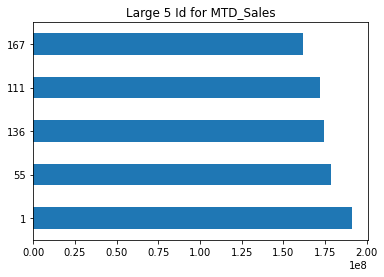

In [17]:
# plt.figure(figsize=(20,8))
Sales=[]
for un in df['Id'].unique():
  Sales.append(sum(df[df['Id']==un]['MTD_Sales']))
plt.title("Large 5 Id for MTD_Sales")
pd.Series(Sales,index=df['Id'].unique()).nlargest(5).plot(kind='barh')

<AxesSubplot:title={'center':'Small 5 Id for MTD_Sales'}>

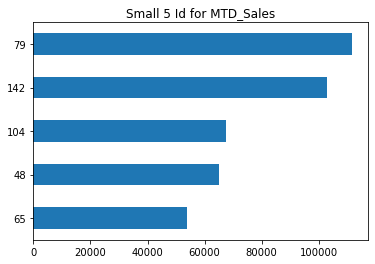

In [18]:
# plt.figure(figsize=(20,8))
plt.title("Small 5 Id for MTD_Sales")
pd.Series(Sales,index=df['Id'].unique()).nsmallest(5).plot(kind='barh')

<AxesSubplot:title={'center':'Large 5 Disease Area for MTD_Sales'}>

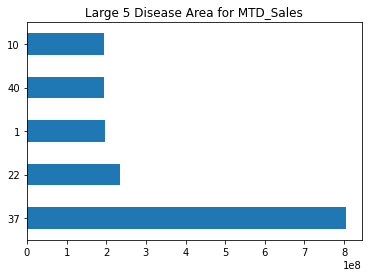

In [19]:
Disease=[]
for un in df['Disease_Area'].unique():
  Disease.append(sum(df[df['Disease_Area']==un]['MTD_Sales']))
plt.title("Large 5 Disease Area for MTD_Sales")
pd.Series(Disease,index=df['Disease_Area'].unique()).nlargest(5).plot(kind='barh')

<AxesSubplot:title={'center':'Small 5 Disease Area for MTD_Sales'}>

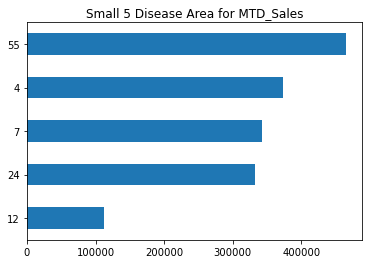

In [20]:
plt.title("Small 5 Disease Area for MTD_Sales")
pd.Series(Disease,index=df['Disease_Area'].unique()).nsmallest(5).plot(kind='barh')

<AxesSubplot:title={'center':'Large 5 Month for MTD_Sales'}>

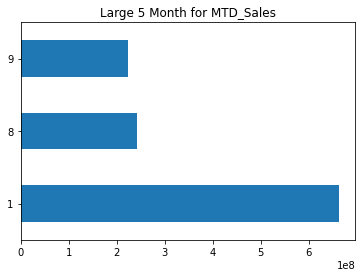

In [21]:
Month=[]
for un in df['Month'].unique():
  Month.append(sum(df[df['Month']==un]['MTD_Sales']))
plt.title("Large 5 Month for MTD_Sales")
pd.Series(Month,index=df['Month'].unique()).nlargest(3).plot(kind='barh')

<AxesSubplot:title={'center':'Small 5 Month for MTD_Sales'}>

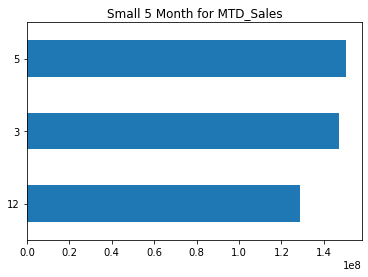

In [22]:
plt.title("Small 5 Month for MTD_Sales")
pd.Series(Month,index=df['Month'].unique()).nsmallest(3).plot(kind='barh')

In [23]:
df

,Id,Month,MTD_Budget,MTD_Sales,MTD Surplus_Deficit,MTD_Achievement,Disease_Area
0,9,1,1760726.49,861962.98,-898763.51,48.95,1
1,9,2,1594030.49,212710.09,-1381320.40,13.34,1
2,9,3,1739889.49,194239.88,-1545649.61,11.16,1
3,9,4,1666959.99,256641.30,-1410318.68,15.40,1
4,9,5,1594030.49,190588.85,-1403441.64,11.96,1
...,...,...,...,...,...,...,...
1999,85,8,728266.16,43793.44,-684472.72,6.01,61
2000,85,9,728266.16,43974.00,-684292.16,6.04,61
2001,85,10,724329.58,33700.50,-690629.08,4.65,61
2002,85,11,708583.29,61385.63,-647197.66,8.66,61


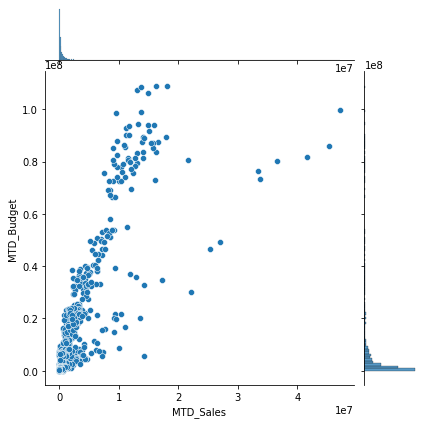

In [24]:
sns.jointplot(y='MTD_Budget',x='MTD_Sales',data=df)

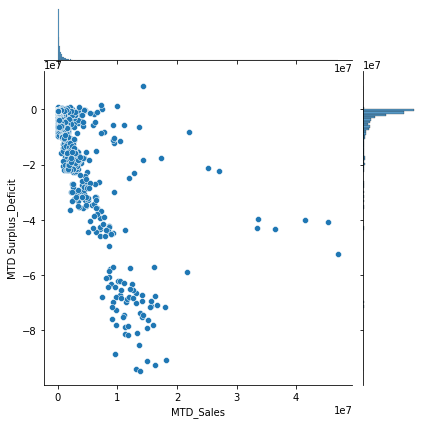

In [25]:
sns.jointplot(y='MTD Surplus_Deficit',x='MTD_Sales',data=df)

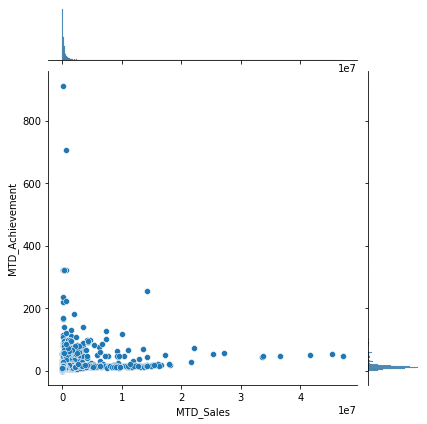

In [26]:
sns.jointplot(y='MTD_Achievement',x='MTD_Sales',data=df)

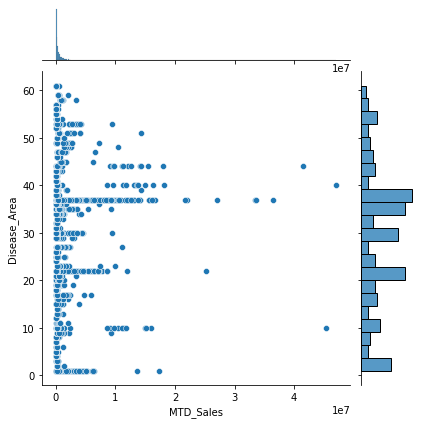

In [27]:
sns.jointplot(y='Disease_Area',x='MTD_Sales',data=df)

In [28]:
df

,Id,Month,MTD_Budget,MTD_Sales,MTD Surplus_Deficit,MTD_Achievement,Disease_Area
0,9,1,1760726.49,861962.98,-898763.51,48.95,1
1,9,2,1594030.49,212710.09,-1381320.40,13.34,1
2,9,3,1739889.49,194239.88,-1545649.61,11.16,1
3,9,4,1666959.99,256641.30,-1410318.68,15.40,1
4,9,5,1594030.49,190588.85,-1403441.64,11.96,1
...,...,...,...,...,...,...,...
1999,85,8,728266.16,43793.44,-684472.72,6.01,61
2000,85,9,728266.16,43974.00,-684292.16,6.04,61
2001,85,10,724329.58,33700.50,-690629.08,4.65,61
2002,85,11,708583.29,61385.63,-647197.66,8.66,61


In [29]:
x=df.drop(['MTD_Sales'],axis=1)
y=df['MTD_Sales']

In [30]:
df

,Id,Month,MTD_Budget,MTD_Sales,MTD Surplus_Deficit,MTD_Achievement,Disease_Area
0,9,1,1760726.49,861962.98,-898763.51,48.95,1
1,9,2,1594030.49,212710.09,-1381320.40,13.34,1
2,9,3,1739889.49,194239.88,-1545649.61,11.16,1
3,9,4,1666959.99,256641.30,-1410318.68,15.40,1
4,9,5,1594030.49,190588.85,-1403441.64,11.96,1
...,...,...,...,...,...,...,...
1999,85,8,728266.16,43793.44,-684472.72,6.01,61
2000,85,9,728266.16,43974.00,-684292.16,6.04,61
2001,85,10,724329.58,33700.50,-690629.08,4.65,61
2002,85,11,708583.29,61385.63,-647197.66,8.66,61


In [31]:
Scaler=StandardScaler()
x=Scaler.fit_transform(x)

In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2004 non-null   int64  
 1   Month                2004 non-null   int64  
 2   MTD_Budget           2004 non-null   float64
 3   MTD_Sales            2004 non-null   float64
 4   MTD Surplus_Deficit  2004 non-null   float64
 5   MTD_Achievement      2004 non-null   float64
 6   Disease_Area         2004 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 109.7 KB


In [34]:
Reg=LinearRegression()
Reg.fit(xtrain,ytrain)
Reg.score(xtest,ytest)

0.999069505287075

In [35]:
import pickle

In [36]:
# save the model to disk
filename = 'finalized_model_reg.sav'
pickle.dump(Reg, open(filename, 'wb'))

In [37]:
Reg.score(xtrain,ytrain)

0.9997002653404985

In [38]:
Reg.fit(x,y)
Reg.score(x,y)

0.9996325633718944

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

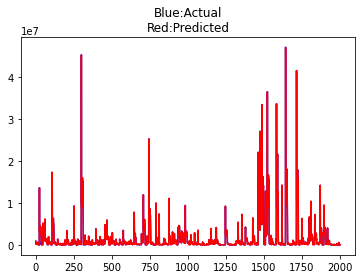

In [39]:
plt.plot(df['MTD_Sales'],color='blue')
plt.plot(Reg.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [40]:
Tree=DecisionTreeRegressor()
Tree.fit(xtrain,ytrain)
Tree.score(xtest,ytest)

0.9489140171421037

In [41]:
# save the model to disk
filename = 'finalized_model_tree.sav'
pickle.dump(Tree, open(filename, 'wb'))

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

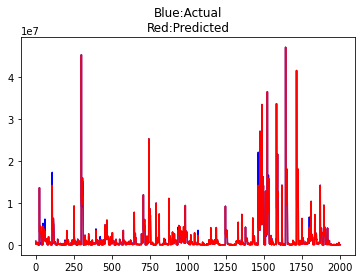

In [42]:
plt.plot(df['MTD_Sales'],color='blue')
plt.plot(Tree.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [43]:
Forest=RandomForestRegressor(n_estimators=25,random_state=3)
Forest.fit(xtrain,ytrain)
Forest.score(xtest,ytest)

0.947990308402408

In [44]:
Forest=RandomForestRegressor(n_estimators=45,random_state=2)
Forest.fit(xtrain,ytrain)
Forest.score(xtest,ytest)

0.9451141589915806

In [45]:
Forest=RandomForestRegressor(n_estimators=15)
Forest.fit(xtrain,ytrain)
Forest.score(xtest,ytest)

0.9404572577624895

In [46]:
# save the model to disk
filename = 'finalized_model_forest.sav'
pickle.dump(Forest, open(filename, 'wb'))

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

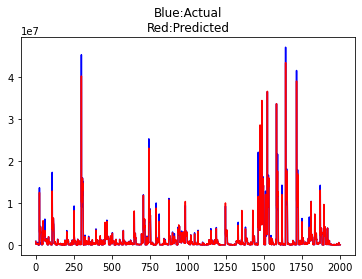

In [47]:
plt.plot(df['MTD_Sales'],color='blue')
plt.plot(Forest.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [48]:
KNN=KNeighborsRegressor(n_neighbors=7)
KNN.fit(xtrain,ytrain)
KNN.score(xtest,ytest)

0.8413199053965887

In [49]:
# save the model to disk
filename = 'finalized_model_knn.sav'
pickle.dump(KNN, open(filename, 'wb'))

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

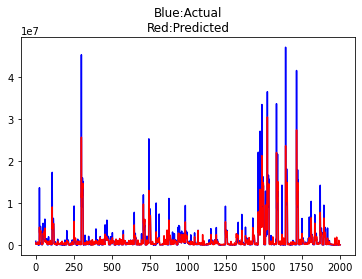

In [50]:
plt.plot(df['MTD_Sales'],color='blue')
plt.plot(KNN.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [51]:
XGB=XGBRegressor()
XGB.fit(xtrain,ytrain)
XGB.score(xtest,ytest)

0.9543264497451389

In [52]:
XGB=XGBRegressor(eta=0.3,n_estimators=105,verbosity=1,max_depth=5)
XGB.fit(xtrain,ytrain)
XGB.score(xtest,ytest)

0.9548119117816873

In [53]:
XGB.fit(x,y)
print(XGB.score(x,y))
XGB.fit(xtrain,ytrain)
print(XGB.score(xtest,ytest))

0.9999481270845977
0.9548119117816873


In [54]:
# save the model to disk
filename = 'finalized_model_xgb.sav'
pickle.dump(XGB, open(filename, 'wb'))

Text(0.5, 1.0, 'Blue:Actual\nRed:Predicted')

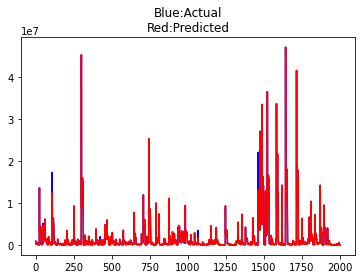

In [55]:
plt.plot(df['MTD_Sales'],color='blue')
plt.plot(XGB.predict(x),color='red')
plt.title("Blue:Actual\nRed:Predicted")

In [56]:
Tree=DecisionTreeRegressor()
Forest=RandomForestRegressor(n_estimators=45,random_state=2)
Reg=LinearRegression()
KNN=KNeighborsRegressor(n_neighbors=7)
XGB=XGBRegressor(eta=0.3,n_estimators=105,verbosity=1,max_depth=5)

In [57]:
Algo=[Tree,Forest,Reg,KNN,XGB]
MSE=[]
MAE=[]
R2=[]
RMSE=[]
MAPE=[]
for K in Algo:
    K.fit(xtrain,ytrain)
    Pred=K.predict(xtest)
    R2.append(r2_score(ytest,Pred))
    MSE.append(mean_squared_error(ytest,Pred))
    MAE.append(mean_absolute_error(ytest,Pred))
    RMSE.append(np.sqrt(mean_squared_error(ytest,Pred)))
    MAPE.append(mean_absolute_error(ytest,Pred)*100)

In [58]:
Table=pd.DataFrame()
Table['Algorithms']=["Tree","Forest","Reg","KNN","XGB"]
Table['MSE']=MSE
Table['MAE']=MAE
Table['R2 Score']=R2
Table['RMSE']=RMSE
Table['MAPE']=MAPE

In [59]:
Table

,Algorithms,MSE,MAE,R2 Score,RMSE,MAPE
0,Tree,4.417858e+11,159925.106633,0.934079,6.646697e+05,1.599251e+07
1,Forest,3.678319e+11,118698.874118,0.945114,6.064915e+05,1.186989e+07
2,Reg,6.235956e+09,24455.073878,0.999070,7.896807e+04,2.445507e+06
3,KNN,1.063437e+12,343719.894026,0.841320,1.031231e+06,3.437199e+07
4,XGB,3.028399e+11,109266.398557,0.954812,5.503089e+05,1.092664e+07


# Table

<AxesSubplot:xlabel='Algorithms', ylabel='MSE'>

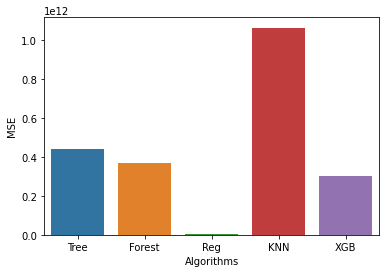

In [60]:
sns.barplot(x='Algorithms',y='MSE',data=Table)

<AxesSubplot:xlabel='Algorithms', ylabel='MAE'>

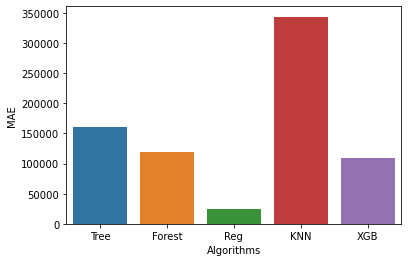

In [61]:
sns.barplot(x='Algorithms',y='MAE',data=Table)

<AxesSubplot:xlabel='Algorithms', ylabel='RMSE'>

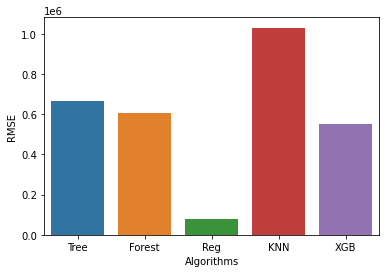

In [62]:
sns.barplot(x='Algorithms',y='RMSE',data=Table)

<AxesSubplot:xlabel='Algorithms', ylabel='MAPE'>

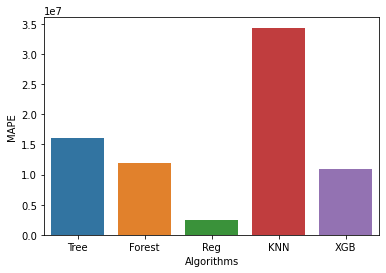

In [63]:
sns.barplot(x='Algorithms',y='MAPE',data=Table)

<AxesSubplot:xlabel='Algorithms', ylabel='R2 Score'>

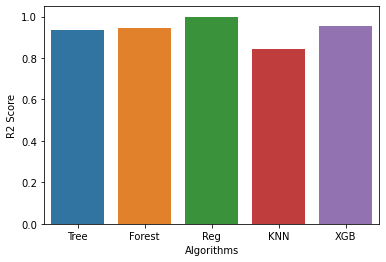

In [64]:
sns.barplot(x='Algorithms',y='R2 Score',data=Table)

In [ ]:
Input=[]
for i in list(df.columns.drop('MTD_Sales')):
    item=input(f"Enter {i}:")
    Input.append(item)

In [ ]:
Reg.predict(Scaler.transform([Input]))

In [ ]:
Reg.coef_

In [ ]:
Reg.intercept_

In [ ]:
Scaler.transform([Input])

In [ ]:
New_df=pd.DataFrame()
New_df['Actual']=df['MTD_Sales']
New_df['Predicted']=Reg.predict(x)
New_df

In [ ]:
Reg.predict(x[[142]])